### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [161]:
data = pd.read_csv('data/coupons.csv')

In [162]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [163]:
# Display the number of missing values in each column
print(data.isnull().sum())

# Display the percentage of missing values in each column
print(data.isnull().sum() / len(data) * 100)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
exp

Get a listing of columns that have missing data.

In [164]:
columns_with_missing = data.columns[data.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing)

Columns with missing values: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


Visualize the missing data in the dataset.

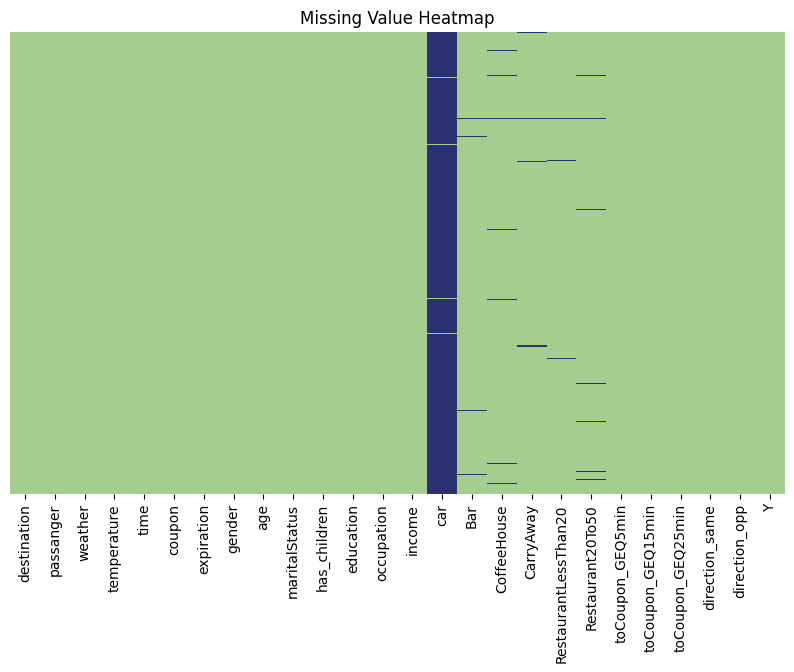

In [165]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='crest')
plt.title('Missing Value Heatmap')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [166]:
# Drop the 'car' column
data = data.drop('car', axis=1)

# Verify that the column has been dropped
print(data.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


For data cleanliness, you can view how many rows would be dropped if you dropped all rows that had null values.

In [167]:
rows_with_nulls = data.isnull().any(axis=1).sum()
print(f"\nTotal rows with at least one null value: {rows_with_nulls}")
print(f"Percentage of rows with nulls: {(rows_with_nulls / len(data)) * 100:.2f}%")


Total rows with at least one null value: 605
Percentage of rows with nulls: 4.77%


To keep the data clean, any rows with null values in columns will be removed. The percentage of rows is <5%, which is acceptable for this exercise.

In [168]:
# Store the original number of rows
original_rows = len(data)

# Drop rows with null values
data_cleaned = data.dropna()

# Calculate the number of rows dropped
rows_dropped = original_rows - len(data_cleaned)

# Print the results
print(f"Original number of rows: {original_rows}")
print(f"Number of rows after dropping nulls: {len(data_cleaned)}")
print(f"Number of rows dropped: {rows_dropped}")
print(f"Percentage of rows dropped: {(rows_dropped / original_rows) * 100:.2f}%")

data_cleaned.head()

Original number of rows: 12684
Number of rows after dropping nulls: 12079
Number of rows dropped: 605
Percentage of rows dropped: 4.77%


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [169]:
# Calculate the total number of acceptances
total_acceptances = data_cleaned['Y'].sum()

# Calculate the total number of observations
total_observations = len(data_cleaned)

# Calculate the proportion of acceptances
proportion_accepted = total_acceptances / total_observations

# Print the results
print(f"Total observations: {total_observations}")
print(f"Total acceptances: {total_acceptances}")
print(f"Proportion of acceptances: {proportion_accepted:.4f}")
print(f"Percentage of acceptances: {proportion_accepted * 100:.2f}%")

Total observations: 12079
Total acceptances: 6877
Proportion of acceptances: 0.5693
Percentage of acceptances: 56.93%


5. Use a bar plot to visualize the `coupon` column.

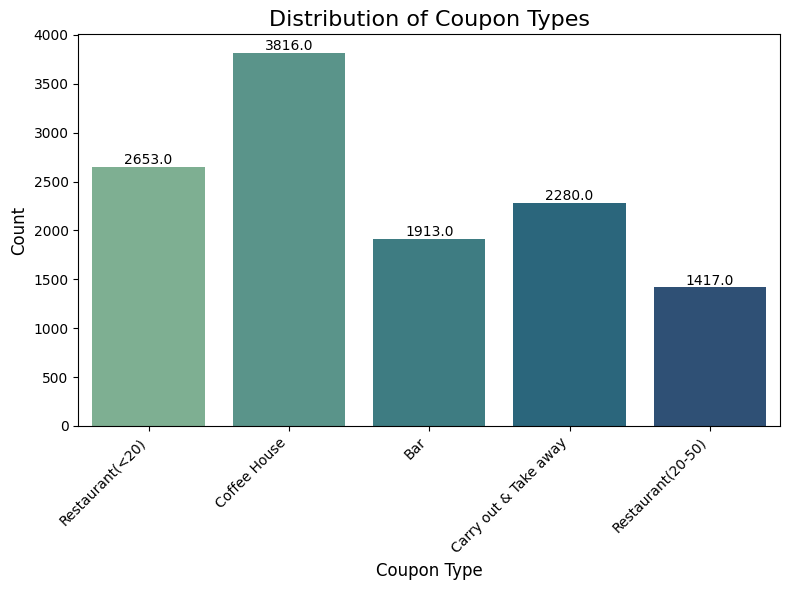

In [171]:
# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(x='coupon', data=data_cleaned, palette='crest', hue='coupon')

# Customize the plot
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels if they're overlapping
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, xytext=(0, 5),
                        textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Show a stacked bar chart showing the acceptance rates for each coupon type.

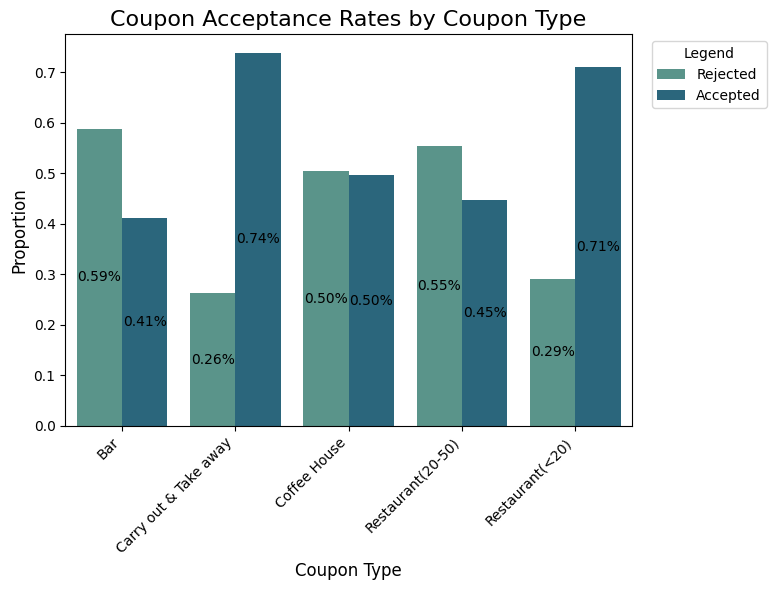

In [172]:
# Create a cross-tabulation of the data
cross_tab = pd.crosstab(data_cleaned['coupon'], data_cleaned['Y'], normalize='index')

# Reset the index to make 'coupon' a column
cross_tab = cross_tab.reset_index()

# Melt the dataframe to long format
melted_data = pd.melt(cross_tab, id_vars=['coupon'], var_name='Acceptance', value_name='Proportion')

# Create the stacked bar chart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='coupon', y='Proportion', hue='Acceptance', data=melted_data, palette='crest')

# Customize the plot
plt.title('Coupon Acceptance Rates by Coupon Type', fontsize=16)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Modify the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Rejected', 'Accepted'], title='Legend', loc='upper right', bbox_to_anchor=(1.25, 1))

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add percentage labels on the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f%%', label_type='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

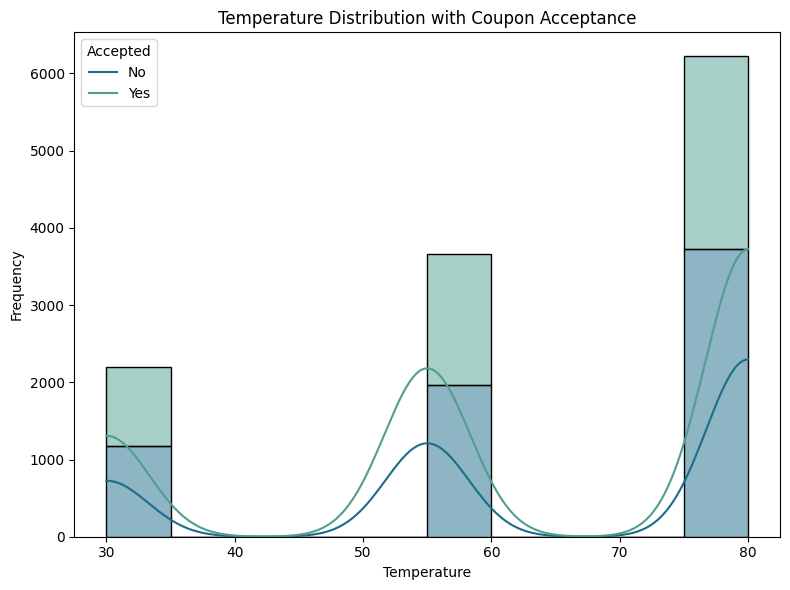

In [173]:
# Set the size of the figure to 10 inches wide by 6 inches tall
plt.figure(figsize=(8, 6))

# Create a histogram plot using seaborn
sns.histplot(data=data_cleaned, x='temperature', hue='Y', bins=10, kde=True, palette="crest", multiple="stack")

# Set the title of the plot and the axis labels
plt.title('Temperature Distribution with Coupon Acceptance')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Add a legend to the plot
plt.legend(title='Accepted', labels=['No', 'Yes'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [174]:
# Create a new DataFrame with only 'bar' coupons
bar_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Bar'].copy()

# Reset the index of the new DataFrame
bar_coupons_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the new DataFrame to verify
print(bar_coupons_df.head())

# Display the shape of the new DataFrame to see how many rows it contains
print("Shape of bar_coupons_df:", bar_coupons_df.shape)

       destination  passanger weather  temperature  time coupon expiration  \
0  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
1             Home      Alone   Sunny           55   6PM    Bar         1d   
2             Work      Alone   Sunny           55   7AM    Bar         1d   
3  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
4             Home      Alone   Sunny           55   6PM    Bar         1d   

  gender age maritalStatus  ...  CoffeeHouse CarryAway RestaurantLessThan20  \
0   Male  21        Single  ...        less1       4~8                  4~8   
1   Male  21        Single  ...        less1       4~8                  4~8   
2   Male  21        Single  ...        less1       4~8                  4~8   
3   Male  46        Single  ...          4~8       1~3                  1~3   
4   Male  46        Single  ...          4~8       1~3                  1~3   

  Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min to

2. What proportion of bar coupons were accepted?

In [175]:
# Calculate the total number of acceptances
total_acceptances = bar_coupons_df['Y'].sum()

# Calculate the total number of observations
total_observations = len(bar_coupons_df)

# Calculate the proportion of acceptances
proportion_accepted = total_acceptances / total_observations

# Print the results
print(f"Total observations: {total_observations}")
print(f"Total acceptances: {total_acceptances}")
print(f"Proportion of acceptances: {proportion_accepted:.4f}")
print(f"Percentage of acceptances: {proportion_accepted * 100:.2f}%")

Total observations: 1913
Total acceptances: 788
Proportion of acceptances: 0.4119
Percentage of acceptances: 41.19%


The visualization of the bar coupons based on how many were accepted or rejected.

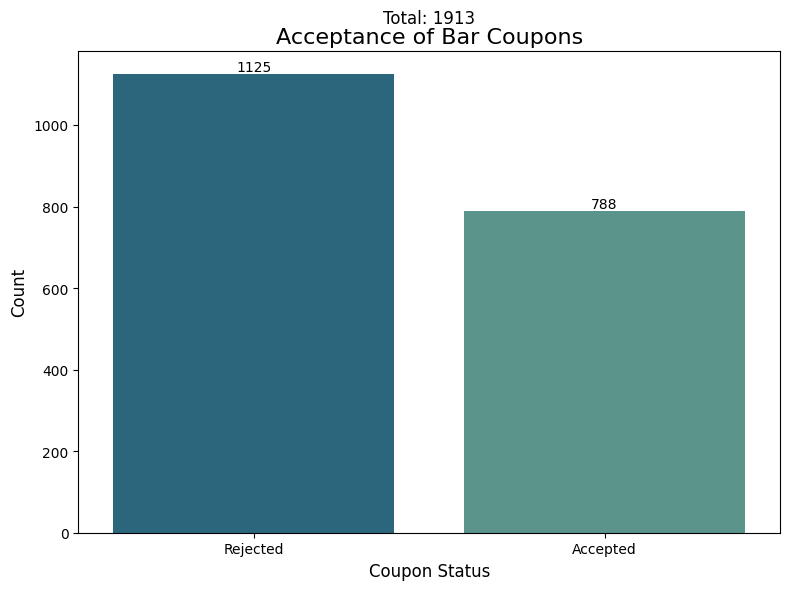

In [176]:
# Create a new column with string labels
bar_coupons_df['Coupon Status'] = bar_coupons_df['Y'].map({0: 'Rejected', 1: 'Accepted'})

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=bar_coupons_df, x='Coupon Status', hue='Coupon Status',
                    order=['Rejected', 'Accepted'],
                    palette='crest')

# Customize the plot
plt.title('Acceptance of Bar Coupons', fontsize=16)
plt.xlabel('Coupon Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

# Add total count
total = len(bar_coupons_df)
plt.text(0.5, 1.05, f'Total: {total}',
            ha='center', va='bottom', fontsize=12, transform=ax.transAxes)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

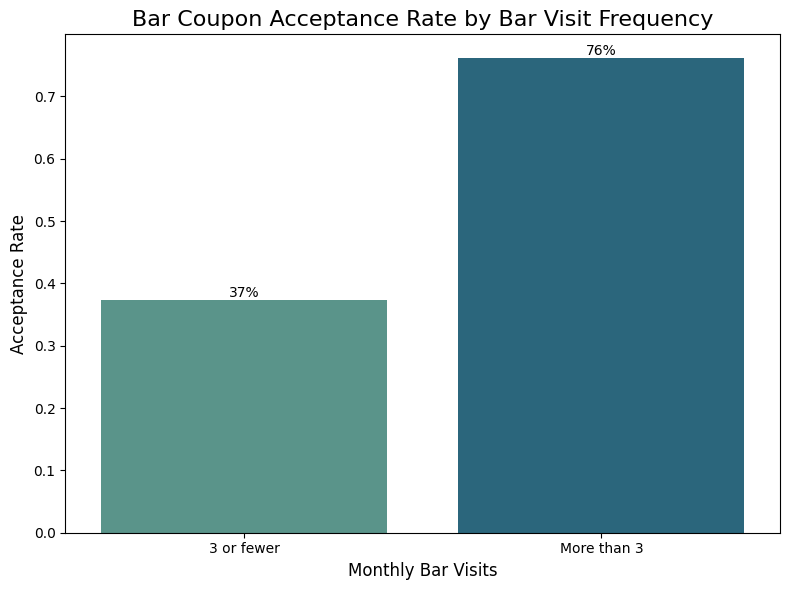

In [177]:
# Create a function to categorize bar visits
def categorize_bar_visits(visits):
    if visits in ['never', 'less1', '1~3']:
        return '3 or fewer'
    elif visits in ['gt8', '4~8']:
        return 'More than 3'
    else:
        return 'Unknown'

# Apply the categorization
bar_coupons_df['bar_visit_frequency'] = bar_coupons_df['Bar'].apply(categorize_bar_visits)

# Set up the plot
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(x='bar_visit_frequency', y='Y', data=bar_coupons_df,
            hue='bar_visit_frequency', palette='crest', errorbar=None)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency', fontsize=16)
plt.xlabel('Monthly Bar Visits', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Add value labels on top of the bars
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt=lambda x: f'{x*100:.0f}%', label_type='edge')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

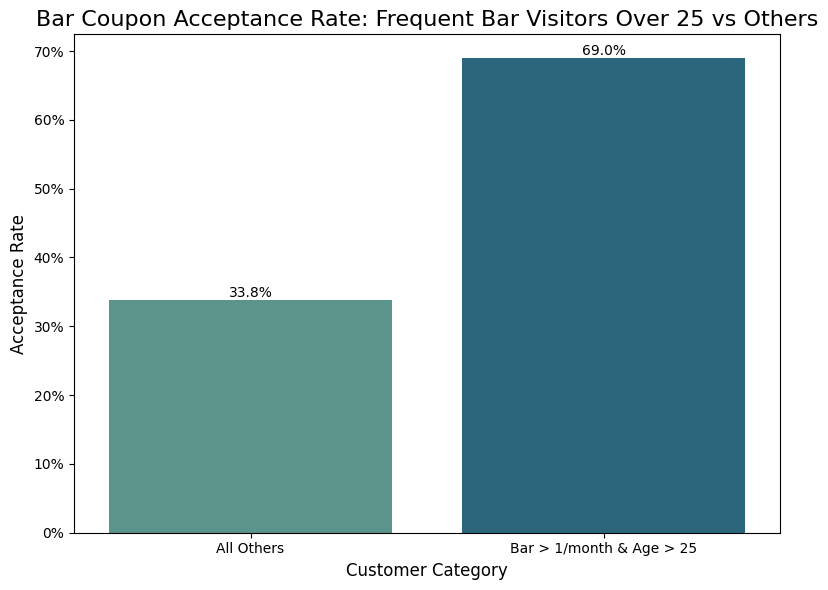

In [178]:
def clean_age(age):
    if isinstance(age, str):
        if age == 'below21':
            return 20
        elif age.endswith('plus'):
            return age.replace('plus', '')
    return age

def categorize_customers(row):
    bar_more_than_once = row['Bar'] in ['1~3', '4~8', 'gt8']
    over_25 = int(row['age']) > 25

    if bar_more_than_once and over_25:
        return 'Bar > 1/month & Age > 25'
    else:
        return 'All Others'

# Clean the 'age' column
bar_coupons_df['age'] = bar_coupons_df['age'].apply(clean_age)

# Apply the categorization
bar_coupons_df['customer_category'] = bar_coupons_df.apply(categorize_customers, axis=1)

# Calculate acceptance rates
acceptance_rates = bar_coupons_df.groupby('customer_category')['Y'].mean().reset_index()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_category', y='Y', data=acceptance_rates, hue='customer_category', palette='crest', dodge=False)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate: Frequent Bar Visitors Over 25 vs Others', fontsize=16)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Add value labels on top of the bars
for i, v in enumerate(acceptance_rates['Y']):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

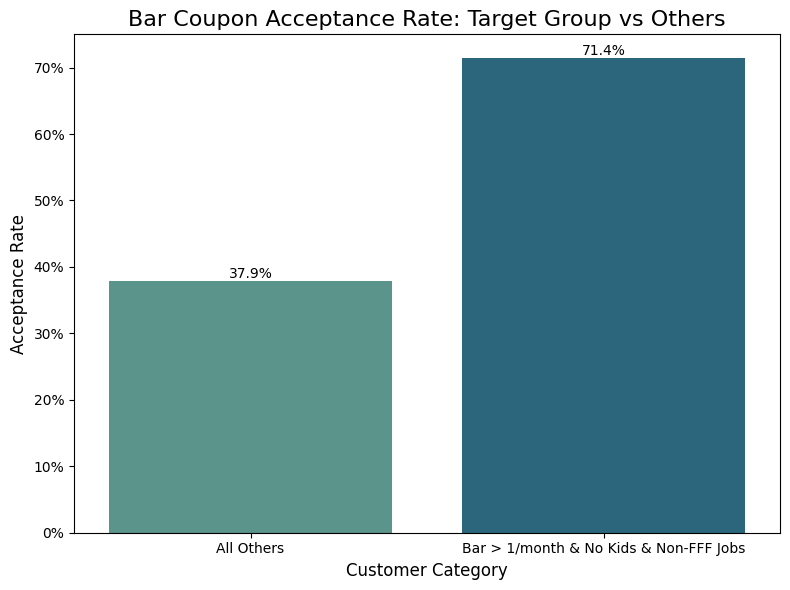

In [179]:
def categorize_customers(row):
    bar_more_than_once = row['Bar'] in ['1~3', '4~8', 'gt8']
    passenger_not_kid = row['passanger'] in ['Friend(s)', 'Partner']
    occupation_not_farming_fishing_forestry = row['occupation'] not in ['Farming Fishing & Forestry']

    if bar_more_than_once and passenger_not_kid and occupation_not_farming_fishing_forestry:
        return 'Bar > 1/month & No Kids & Non-FFF Jobs'
    else:
        return 'All Others'

# Apply the categorization
bar_coupons_df['customer_category'] = bar_coupons_df.apply(categorize_customers, axis=1)

# Calculate acceptance rates
acceptance_rates = bar_coupons_df.groupby('customer_category')['Y'].mean().reset_index()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_category', y='Y', data=acceptance_rates, hue='customer_category', palette='crest', dodge=False)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate: Target Group vs Others', fontsize=16)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Add value labels on top of the bars
for i, v in enumerate(acceptance_rates['Y']):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

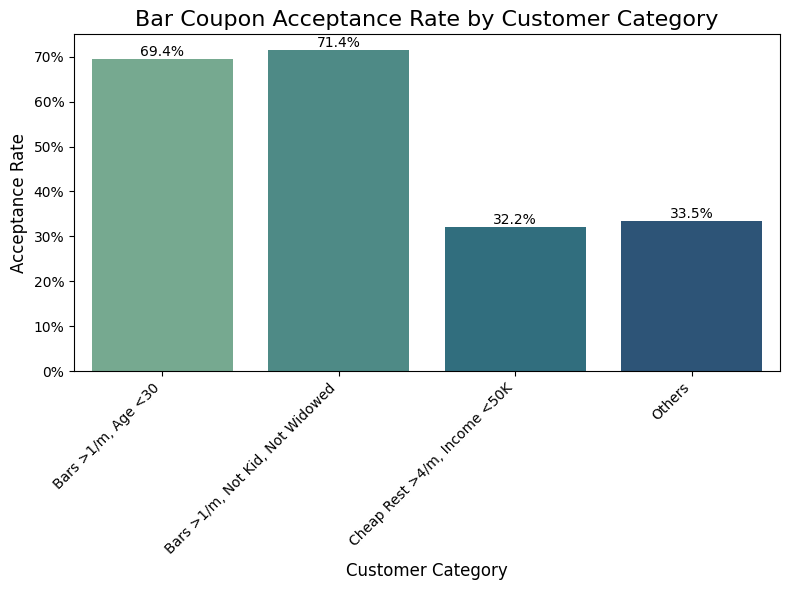

In [180]:
def categorize_customers(row):
    # Group 1: Bars > 1/month, passengers not kid, not widowed
    group1 = (row['Bar'] in ['1~3', '4~8', 'gt8'] and
                row['passanger'] in ['Friend(s)', 'Partner'] and
                row['maritalStatus'] != 'Widowed')

    # Group 2: Bars > 1/month, age < 30
    group2 = (row['Bar'] in ['1~3', '4~8', 'gt8'] and
                int(row['age']) < 30)

    # Group 3: Cheap restaurants > 4/month, income < 50K
    group3 = (row['RestaurantLessThan20'] in ['4~8', 'gt8'] and
                row['income'] in ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500'])

    if group1:
        return 'Bars >1/m, Not Kid, Not Widowed'
    elif group2:
        return 'Bars >1/m, Age <30'
    elif group3:
        return 'Cheap Rest >4/m, Income <50K'
    else:
        return 'Others'

# Apply the categorization
bar_coupons_df['customer_category'] = bar_coupons_df.apply(categorize_customers, axis=1)

# Calculate acceptance rates
acceptance_rates = bar_coupons_df.groupby('customer_category')['Y'].mean().reset_index()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_category', y='Y', data=acceptance_rates, hue='customer_category', palette='crest', dodge=False)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate by Customer Category', fontsize=16)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Add value labels on top of the bars
for i, v in enumerate(acceptance_rates['Y']):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Hypothesis

Customers who frequently visit bars (more than once a month) and exhibit specific social and demographic characteristics are significantly more likely to accept bar coupons.

Specifically:
1. Individuals who go to bars more than once a month, are accompanied by friends or a partner (rather than children), and are not widowed show a higher acceptance rate for bar coupons.
2. Young adults (under 30 years old) who visit bars more than once a month also demonstrate a higher propensity to accept bar coupons.

This hypothesis suggests that bar coupon acceptance is positively correlated with:
1. Frequent bar visits
2. Social companionship (friends or partners)
3. Non-widowed marital status
4. Younger age (specifically under 30)

The higher acceptance rates among these groups may be attributed to their lifestyle, social habits, and disposable income allocation. These factors likely contribute to a greater interest in and willingness to use bar coupons.

This hypothesis could inform targeted marketing strategies, suggesting that bar coupons may be most effective when directed towards young, socially active individuals who are already frequent bar-goers. However, further analysis and possibly experimental validation would be necessary to confirm this hypothesis and understand the underlying causal relationships.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

1. Create a new `DataFrame` that contains just the carry out coupons.

In [181]:
# Create a new DataFrame with only 'bar' coupons
carryout_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Carry out & Take away'].copy()

# Reset the index of the new DataFrame
carryout_coupons_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the new DataFrame to verify
print(carryout_coupons_df.head())

# Display the shape of the new DataFrame to see how many rows it contains
print("Shape of carryout_coupons_df:", carryout_coupons_df.shape)

       destination  passanger weather  temperature  time  \
0  No Urgent Place  Friend(s)   Sunny           80  10AM   
1  No Urgent Place  Friend(s)   Sunny           55   2PM   
2             Work      Alone   Sunny           80   7AM   
3  No Urgent Place  Friend(s)   Sunny           80  10AM   
4  No Urgent Place  Friend(s)   Sunny           55   2PM   

                  coupon expiration gender age maritalStatus  ...  \
0  Carry out & Take away         2h   Male  21        Single  ...   
1  Carry out & Take away         1d   Male  21        Single  ...   
2  Carry out & Take away         2h   Male  21        Single  ...   
3  Carry out & Take away         2h   Male  46        Single  ...   
4  Carry out & Take away         1d   Male  46        Single  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        less1       4~8                  4~8            less1   
1        less1       4~8                  4~8            less1   
2        less1       4~8  

2. What proportion of carry out coupons were accepted?

In [182]:
# Calculate the total number of acceptances
total_acceptances = carryout_coupons_df['Y'].sum()

# Calculate the total number of observations
total_observations = len(carryout_coupons_df)

# Calculate the proportion of acceptances
proportion_accepted = total_acceptances / total_observations

# Print the results
print(f"Total observations: {total_observations}")
print(f"Total acceptances: {total_acceptances}")
print(f"Proportion of acceptances: {proportion_accepted:.4f}")
print(f"Percentage of acceptances: {proportion_accepted * 100:.2f}%")

Total observations: 2280
Total acceptances: 1682
Proportion of acceptances: 0.7377
Percentage of acceptances: 73.77%


The visualization of the carry out coupons based on how many were accepted or rejected.

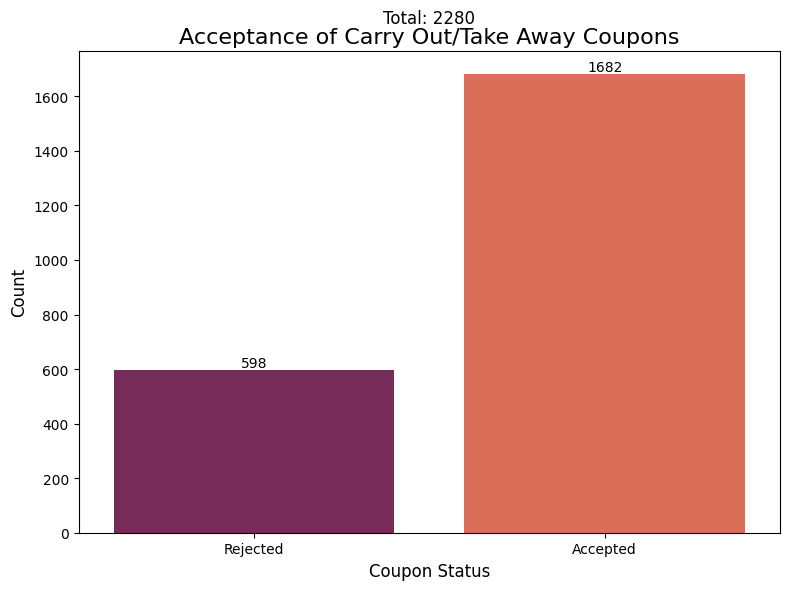

In [183]:
# Create a new column with string labels
carryout_coupons_df['Coupon Status'] = carryout_coupons_df['Y'].map({0: 'Rejected', 1: 'Accepted'})

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=carryout_coupons_df, x='Coupon Status', hue='Coupon Status',
                    order=['Rejected', 'Accepted'],
                    palette='rocket')

# Customize the plot
plt.title('Acceptance of Carry Out/Take Away Coupons', fontsize=16)
plt.xlabel('Coupon Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

# Add total count
total = len(carryout_coupons_df)
plt.text(0.5, 1.05, f'Total: {total}',
            ha='center', va='bottom', fontsize=12, transform=ax.transAxes)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

3. Compare the acceptance rate between those who did carry out 3 or fewer times a month to those who went more.

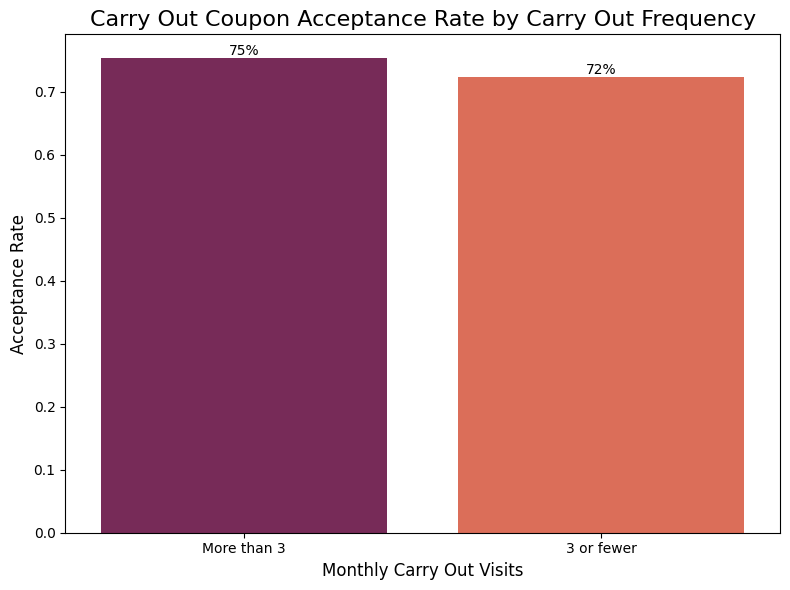

In [184]:
# Create a function to categorize carry out visits
def categorize_carryout_visits(visits):
    if visits in ['never', 'less1', '1~3']:
        return '3 or fewer'
    elif visits in ['gt8', '4~8']:
        return 'More than 3'
    else:
        return 'Unknown'

# Apply the categorization
carryout_coupons_df['carryout_frequency'] = carryout_coupons_df['CarryAway'].apply(categorize_carryout_visits)

# Set up the plot
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(x='carryout_frequency', y='Y', data=carryout_coupons_df,
            hue='carryout_frequency', palette='rocket', errorbar=None)

# Customize the plot
plt.title('Carry Out Coupon Acceptance Rate by Carry Out Frequency', fontsize=16)
plt.xlabel('Monthly Carry Out Visits', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Add value labels on top of the bars
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt=lambda x: f'{x*100:.0f}%', label_type='edge')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who did carry out more than once a month and are over the age of 25 to the all others.  Is there a difference?

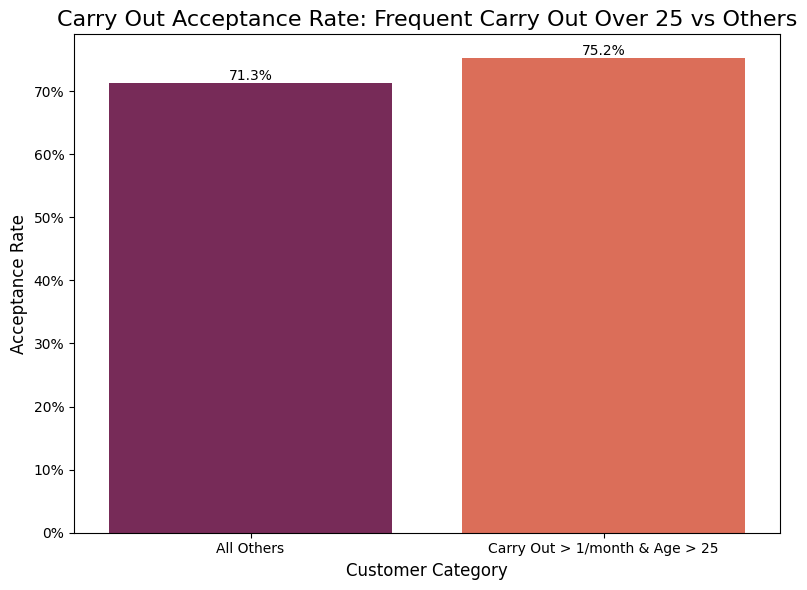

In [185]:
def clean_age(age):
    if isinstance(age, str):
        if age == 'below21':
            return 20
        elif age.endswith('plus'):
            return age.replace('plus', '')
    return age

def categorize_customers(row):
    carryout_more_than_once = row['CarryAway'] in ['1~3', '4~8', 'gt8']
    over_25 = int(row['age']) > 25

    if carryout_more_than_once and over_25:
        return 'Carry Out > 1/month & Age > 25'
    else:
        return 'All Others'

# Clean the 'age' column
carryout_coupons_df['age'] = carryout_coupons_df['age'].apply(clean_age)

# Apply the categorization
carryout_coupons_df['customer_category'] = carryout_coupons_df.apply(categorize_customers, axis=1)

# Calculate acceptance rates
acceptance_rates = carryout_coupons_df.groupby('customer_category')['Y'].mean().reset_index()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_category', y='Y', data=acceptance_rates, hue='customer_category',
            palette='rocket', dodge=False)

# Customize the plot
plt.title('Carry Out Acceptance Rate: Frequent Carry Out Over 25 vs Others', fontsize=16)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Add value labels on top of the bars
for i, v in enumerate(acceptance_rates['Y']):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who do carry out more than once a month and had passengers that were not a kid and had occupations that were either Unemployed or Students.

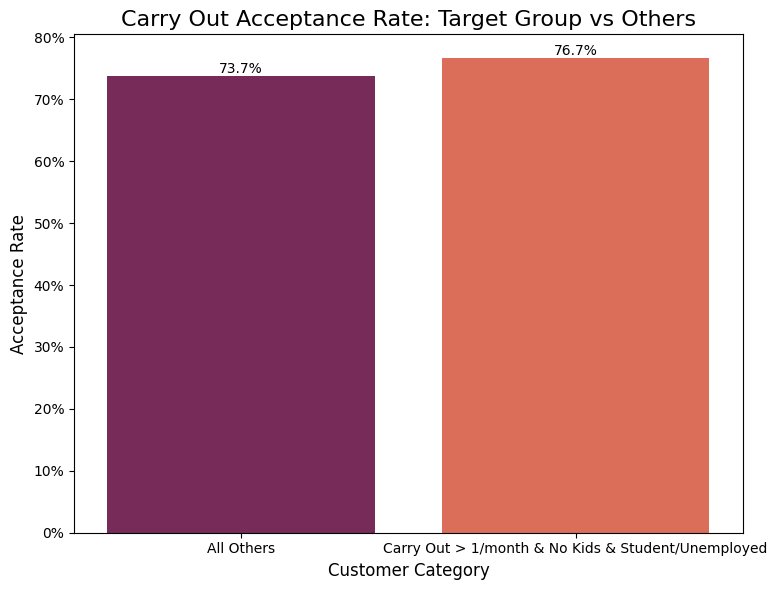

In [186]:
def categorize_customers(row):
    carryout_more_than_once = row['Bar'] in ['1~3', '4~8', 'gt8']
    passenger_not_kid = row['passanger'] in ['Friend(s)', 'Partner']
    occupation_student_unemployed = row['occupation'] in ['Student', 'Unemployed']

    if carryout_more_than_once and passenger_not_kid and occupation_student_unemployed:
        return 'Carry Out > 1/month & No Kids & Student/Unemployed'
    else:
        return 'All Others'

# Apply the categorization
carryout_coupons_df['customer_category'] = carryout_coupons_df.apply(categorize_customers, axis=1)

# Calculate acceptance rates
acceptance_rates = carryout_coupons_df.groupby('customer_category')['Y'].mean().reset_index()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_category', y='Y', data=acceptance_rates, hue='customer_category', palette='rocket', dodge=False)

# Customize the plot
plt.title('Carry Out Acceptance Rate: Target Group vs Others', fontsize=16)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Add value labels on top of the bars
for i, v in enumerate(acceptance_rates['Y']):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

6. Compare the acceptance rates between those drivers who:

- Do carry out more than once a month, had passengers that were not a kid, and were not widowed *OR*
- Do carry out more than once a month and are under the age of 30 *OR*
- Do carry out at cheap restaurants more than 4 times a month and income is less than 50K.

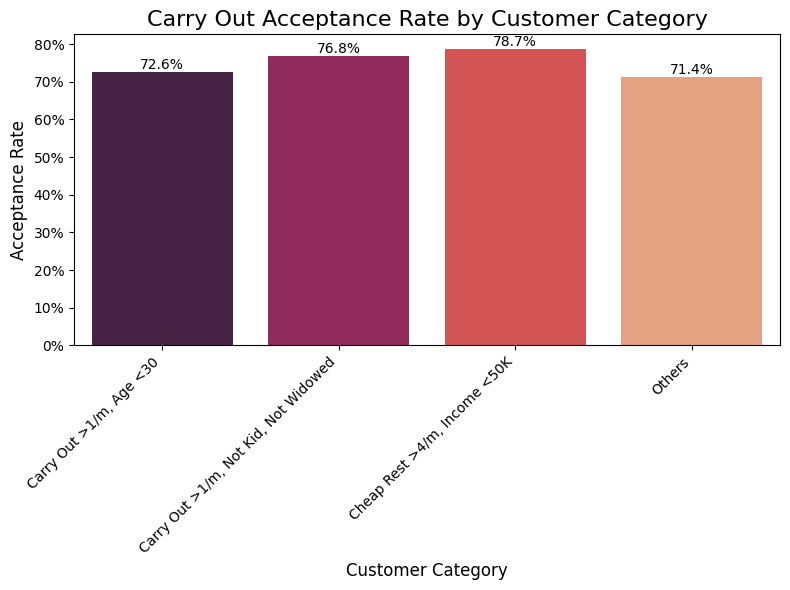

In [187]:
def categorize_customers(row):
    # Group 1: Carry out > 1/month, passengers not kid, not widowed
    group1 = (row['CarryAway'] in ['1~3', '4~8', 'gt8'] and
                row['passanger'] in ['Friend(s)', 'Partner'] and
                row['maritalStatus'] != 'Widowed')

    # Group 2: Carry out > 1/month, age < 30
    group2 = (row['CarryAway'] in ['1~3', '4~8', 'gt8'] and
                int(row['age']) < 30)

    # Group 3: Cheap restaurants > 4/month, income < 50K
    group3 = (row['RestaurantLessThan20'] in ['4~8', 'gt8'] and
                row['income'] in ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500'])

    if group1:
        return 'Carry Out >1/m, Not Kid, Not Widowed'
    elif group2:
        return 'Carry Out >1/m, Age <30'
    elif group3:
        return 'Cheap Rest >4/m, Income <50K'
    else:
        return 'Others'

# Apply the categorization
carryout_coupons_df['customer_category'] = carryout_coupons_df.apply(categorize_customers, axis=1)

# Calculate acceptance rates
acceptance_rates = carryout_coupons_df.groupby('customer_category')['Y'].mean().reset_index()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_category', y='Y', data=acceptance_rates, hue='customer_category',
            palette='rocket', dodge=False)

# Customize the plot
plt.title('Carry Out Acceptance Rate by Customer Category', fontsize=16)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Add value labels on top of the bars
for i, v in enumerate(acceptance_rates['Y']):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the carry out coupons?

**Final Summary**

The data reveals that certain demographic and behavioral characteristics are associated with higher coupon acceptance rates for carry-out establishments. 

Specifically:

1. Customers who frequently use carry-out services (more than once a month), are not accompanied by children, and are not widowed show a high acceptance rate of 76.8%.

2. Younger customers (under 30) who frequently use carry-out services have a strong acceptance rate of 72.6%.

3. The highest acceptance rate (78.7%) is observed among frequent users of inexpensive restaurants (more than 4 times a month) with lower incomes (less than $50K).

These findings suggest that frequency of carry-out use, age, income level, and certain lifestyle factors (not being widowed, not having children present) are significant predictors of coupon acceptance.

Next Steps:

1. Segmentation Strategy: Develop a customer segmentation strategy based on these findings. Focus marketing efforts on the identified high-acceptance groups.

2. Targeted Marketing: Create targeted marketing campaigns for each high-acceptance group, tailoring the message and offers to their specific characteristics and preferences.

3. Further Analysis: 
   - Investigate why lower-income, frequent users of inexpensive restaurants have the highest acceptance rate. This could inform pricing strategies or the types of restaurants to partner with.
   - Explore the reasons behind the slightly lower acceptance rate for younger customers compared to the other two groups.

4. Coupon Customization: Design coupons that appeal specifically to each group. For example, family-friendly offers for those without children, or budget-friendly options for the lower-income segment.

5. Timing and Frequency: Analyze the optimal timing and frequency of coupon distribution for each group to maximize acceptance rates.

6. Mobile App Development: Consider developing or enhancing a mobile app that caters to frequent carry-out users, making it easier for them to access and use coupons.

7. Partnership Expansion: Seek partnerships with a diverse range of carry-out and inexpensive restaurant options to cater to the preferences of the high-acceptance groups.

8. Customer Feedback: Conduct surveys or focus groups with members of these high-acceptance segments to gain deeper insights into their preferences and motivations.

9. ROI Analysis: Perform a return on investment analysis for coupon campaigns targeted at these specific groups versus broader, non-targeted campaigns.

10. Longitudinal Study: Implement a long-term study to track how these acceptance rates change over time and in response to different economic conditions or seasonal factors.

By focusing on these high-acceptance groups and implementing targeted strategies, we can potentially increase the overall effectiveness of our coupon program and drive higher engagement and sales for carry-out establishments.